# Modern Pricing Theory _ CAPM 
## *Short Selling is allowed*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel('20190922.xlsx',sheetname='DataSource_CAPMAssetClasses',
                      header=[1],parse_dates=[0],index_col=[0])

In [3]:
# Covariance
Sigma=data.cov()*12
np.round(data.cov(),2)

,Bloomberg Barclays - U.S. TIPS Index,Bloomberg Barclays - U.S. Aggregate Index,BofA Merrill Lynch - U.S. High Yield Index,FTSE - Non U.S. Govt Bond Index ($),Russell - 1000 Growth Index,Russell - 1000 Value Index,Russell - 2000 Growth Index,Russell - 2000 Value Index,MSCI - EAFE Index ($Net),MSCI - Emerging Markets Index ($ Net),S&P - GSCI Total Index,MSCI - U.S. REIT Index
Bloomberg Barclays - U.S. TIPS Index,2.67,1.24,1.27,2.03,0.15,0.26,-0.28,0.14,0.94,1.76,2.25,2.45
Bloomberg Barclays - U.S. Aggregate Index,1.24,0.95,0.47,1.28,-0.42,-0.31,-0.76,-0.41,0.08,0.18,-0.26,1.12
BofA Merrill Lynch - U.S. High Yield Index,1.27,0.47,6.65,1.16,7.51,6.74,10.02,8.26,8.30,11.21,5.49,9.18
FTSE - Non U.S. Govt Bond Index ($),2.03,1.28,1.16,5.46,0.74,1.29,0.21,0.83,3.64,3.72,3.08,3.45
Russell - 1000 Growth Index,0.15,-0.42,7.51,0.74,23.11,15.72,26.27,17.11,18.26,22.45,8.84,13.55
Russell - 1000 Value Index,0.26,-0.31,6.74,1.29,15.72,17.63,18.42,18.28,16.02,18.34,7.94,16.49
Russell - 2000 Growth Index,-0.28,-0.76,10.02,0.21,26.27,18.42,41.38,27.81,22.28,28.78,12.47,19.72
Russell - 2000 Value Index,0.14,-0.41,8.26,0.83,17.11,18.28,27.81,26.68,17.43,20.81,9.27,22.40
MSCI - EAFE Index ($Net),0.94,0.08,8.30,3.64,18.26,16.02,22.28,17.43,22.19,25.22,12.93,15.84
MSCI - Emerging Markets Index ($ Net),1.76,0.18,11.21,3.72,22.45,18.34,28.78,20.81,25.22,39.65,17.35,18.57


In [4]:
# Annualized Return
m_ret = data/100 + 1
y_ret = (m_ret.prod()**(12/len(m_ret))-1)*100
y_ret

Bloomberg Barclays - U.S. TIPS Index          5.204746
Bloomberg Barclays - U.S. Aggregate Index     4.549061
BofA Merrill Lynch - U.S. High Yield Index    6.301820
FTSE - Non U.S. Govt Bond Index ($)           3.404647
Russell - 1000 Growth Index                   5.054799
Russell - 1000 Value Index                    6.154283
Russell - 2000 Growth Index                   6.139949
Russell - 2000 Value Index                    8.227702
MSCI - EAFE Index ($Net)                      3.521130
MSCI - Emerging Markets Index ($ Net)         8.517774
S&P - GSCI Total Index                        0.569754
MSCI - U.S. REIT Index                        9.651477
dtype: float64

In [5]:
# Unit vector
unit_vec=np.ones([len(data.columns),1])

# Calculate the minimum variance portfolio and the pseudo-maximum sharpe ratio portfolio
Sigma_inv = np.linalg.inv(Sigma);
w_minv_ideal = Sigma_inv.dot(unit_vec)/(unit_vec.T.dot(Sigma_inv)).dot(unit_vec);
w_msr_ideal = Sigma_inv.dot(y_ret)/(unit_vec.T.dot(Sigma_inv)).dot(y_ret);
w_msr_ideal = w_msr_ideal.reshape(-1,1)
weight_ideal = np.hstack((w_minv_ideal,w_msr_ideal))
weight_ideal

array([[-0.26479199, -0.18281607],
       [ 1.20175145,  1.1266578 ],
       [ 0.04951453,  0.08328334],
       [-0.04803426, -0.06954315],
       [ 0.03107269,  0.06533554],
       [ 0.07572186,  0.04304435],
       [-0.00318499, -0.05857769],
       [ 0.03723636,  0.12382533],
       [-0.03350547, -0.13657334],
       [-0.02416522,  0.04459294],
       [ 0.03334852,  0.01142395],
       [-0.05496348, -0.05065302]])

In [6]:
# Build the efficient frontier

def wt_fun(c,w_minv,w_msr):
    wt = (1-c)*w_minv + c*w_msr
    return wt


def ret_func(c,w_minv,w_msr):
    wt = wt_fun(c,w_minv,w_msr)
    ret = y_ret.T.dot(wt)
    return(ret)


def risk_func(c,w_minv,w_msr):
    wt = wt_fun(c,w_minv,w_msr)
    risk = np.sqrt(np.diagonal((wt.T.dot(Sigma)).dot(wt)))
    return(risk)

Text(0.5, 1.0, 'Efficient Frontier (No Risk-Free Asset & Allow Short)')

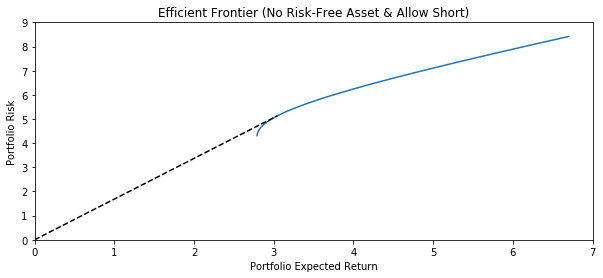

In [7]:
c = np.linspace(0,5,50)
ret_ideal = ret_func(c,w_minv_ideal,w_msr_ideal)
risk_ideal = risk_func(c,w_minv_ideal,w_msr_ideal)

fig= plt.figure(figsize=(10,4))
plt.plot(risk_ideal,ret_ideal)
plt.plot([0,risk_func(1,w_minv_ideal,w_msr_ideal)],[0,ret_func(1,w_minv_ideal,w_msr_ideal)],'k--')
plt.xlim(0,7)
plt.ylim(0,9)
plt.xlabel('Portfolio Expected Return')
plt.ylabel('Portfolio Risk')
plt.title('Efficient Frontier (No Risk-Free Asset & Allow Short)')

In [8]:
# plot portfolio possibilities curve
def get_return_risk(port_i_weights_array,y_ret,y_ret_cov,r_f):
    port_i_y_ret = np.sum(y_ret*port_i_weights_array)
    port_i_y_sigma = np.sqrt(np.dot(port_i_weights_array,np.dot(y_ret_cov,port_i_weights_array.T)))
    port_i_sharpe_ratio = (port_i_y_ret - r_f)/port_i_y_sigma
    return port_i_y_ret,port_i_y_sigma,port_i_sharpe_ratio

In [9]:
# define the minimum objective
def min_neg_sharpe(init_weights_array):
    return -get_return_risk(init_weights_array,y_ret,y_ret_cov,r_f)[2]

def min_sigma(init_weights_array):
    return get_return_risk(init_weights_array,y_ret,y_ret_cov,r_f)[1]

In [10]:
# Get the all posible portfolio 
from scipy.optimize import minimize

def get_all_frontier(y_ret,y_ret_cov,r_f,short_selling=True):
    stock_num = len(y_ret)
    frontier_returns_array = np.linspace(2,8,50)
    frontier_sigma_array = []
    
    for ret in frontier_returns_array:
        #1. returns of frontier equals ret 2.the sum of weights equal to 1
        frontier_cons = ({'type':'eq','fun':lambda x:get_return_risk(x,y_ret,y_ret_cov,r_f)[0]-ret},
                        {'type':'eq','fun':lambda x:np.sum(x)-1})
        if short_selling==True:
            frontier_point = minimize(min_sigma,stock_num*[1./stock_num,],
                                 method = 'SLSQP', constraints = frontier_cons)
            frontier_sigma_array.append(frontier_point['fun'])
        if short_selling==False:
            #3. each weight is larger than 0 (no short selling)
            BNPS = tuple((0.0,1.0) for x in range(stock_num))
            frontier_point = minimize(min_sigma,stock_num*[1./stock_num,],
                                 method = 'SLSQP', constraints = frontier_cons,bounds=BNPS)
            frontier_sigma_array.append(frontier_point['fun'])
    
    frontier_sigma_array =np.array(frontier_sigma_array)
    return frontier_returns_array,frontier_sigma_array

In [11]:
# Define the efficient frontier
from scipy.optimize import minimize

def get_efficient_frontier(y_ret,y_ret_cov,r_f,min_variance_ret,short_selling=True):
    stock_num = len(y_ret)
    frontier_returns_array = np.linspace(min_variance_ret,8,50)
    frontier_sigma_array = []
    
    for ret in frontier_returns_array:
        #1. returns of frontier equals ret 2.the sum of weights equal to 1
        frontier_cons = ({'type':'eq','fun':lambda x:get_return_risk(x,y_ret,y_ret_cov,r_f)[0]-ret},
                        {'type':'eq','fun':lambda x:np.sum(x)-1})
        if short_selling==True:
            frontier_point = minimize(min_sigma,stock_num*[1./stock_num,],
                                 method = 'SLSQP', constraints = frontier_cons)
            frontier_sigma_array.append(frontier_point['fun'])
        if short_selling==False:
            #3. each weight is larger than 0 (no short selling)
            BNPS = tuple((0.0,1.0) for x in range(stock_num))
            frontier_point = minimize(min_sigma,stock_num*[1./stock_num,],
                                 method = 'SLSQP', constraints = frontier_cons,bounds=BNPS)
            frontier_sigma_array.append(frontier_point['fun'])
    
    frontier_sigma_array =np.array(frontier_sigma_array)
    return frontier_returns_array,frontier_sigma_array

In [12]:
# Caculate efficient frontier portfolios
y_ret_cov=Sigma
r_f=0
frontier_ret,frontier_sigma = get_all_frontier(y_ret,y_ret_cov,r_f)

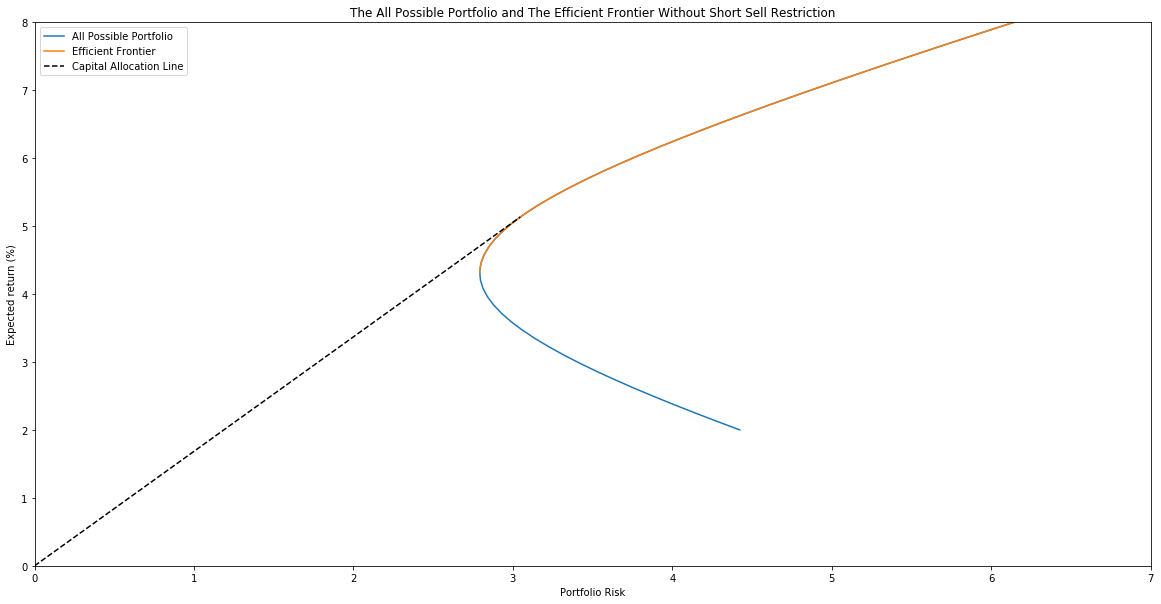

In [13]:
# plot possible portfolio and efficient frontier
plt.figure(figsize = (20,10))
plt.plot(frontier_sigma,frontier_ret,label='All Possible Portfolio')
plt.plot(risk_ideal,ret_ideal,label='Efficient Frontier')
plt.plot([0,risk_func(1,w_minv_ideal,w_msr_ideal)],[0,ret_func(1,w_minv_ideal,w_msr_ideal)],'k--',label='Capital Allocation Line')
plt.ylabel('Expected return (%)')
plt.xlabel('Portfolio Risk')
plt.title('Portfolio possibilities curve')
plt.xlim(0,7)
plt.ylim(0,8)
plt.title('The All Possible Portfolio and The Efficient Frontier Without Short Sell Restriction')
plt.legend()

## *Short Selling is not allowed*

In [15]:
# define the Constraints 
stock_nums = len(data.columns)
# 1. sum of weights equals to 1
CONS = ({'type':'eq','fun':lambda x:np.sum(x)-1})
# 2. each weight is larger than 0 (no short selling)
BNPS = tuple((0.0,1.0) for x in range(stock_nums))

In [16]:
# calculate the minimum variance portfolio

r_f = 0
y_ret_cov = Sigma

#init_weights_array = stock_nums*[1.0/stock_nums,]
MIN_SIGMA = minimize(min_sigma,stock_nums*[1.0/stock_nums,],
                    method = 'SLSQP',bounds=BNPS,constraints=CONS)

MIN_SIGMA

     fun: 3.203592756130918
     jac: array([4.47029814, 3.2036576 , 3.55478755, 4.83354437, 3.20282504,
       3.20645887, 3.20187211, 3.3797366 , 4.83113062, 6.13470384,
       3.1926755 , 7.84063438])
 message: 'Optimization terminated successfully.'
    nfev: 133
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([1.08787976e-14, 9.26511574e-01, 0.00000000e+00, 1.38857450e-14,
       1.30314398e-02, 3.88210911e-02, 8.06805479e-03, 0.00000000e+00,
       5.23119682e-15, 1.10846444e-14, 1.35678407e-02, 3.13140632e-14])

In [17]:
# 1. locate the minimum-variance portfolio
w_minv = MIN_SIGMA['x'].reshape(-1,1)
min_sigma_restrict = MIN_SIGMA['fun']
min_sigma_ret_restrict = np.dot(w_minv.T,y_ret)
print("If the short-sell is not allowed, the variance of minimum-variance portfolio is %f ; The return of minimum-variance portfolio is %f" % (min_sigma_restrict,min_sigma_ret_restrict))

If the short-sell is not allowed, the variance of minimum-variance portfolio is 3.203593 ; The return of minimum-variance portfolio is 4.576813


In [19]:
# 2. locate two other efficient portfolios different than the minimum-variance portfolio
stock_num = len(data.columns)
frontier_returns_array = np.linspace(min_sigma_ret_restrict+1,min_sigma_ret_restrict+3,2)
y_ret_cov = Sigma
r_f = 0
frontier_sigma_array =[]
weights = np.empty((len(y_ret),1))*[]
for ret in frontier_returns_array:
    frontier_cons = ({'type':'eq','fun':lambda x:get_return_risk(x,y_ret,y_ret_cov,r_f)[0]-ret},
                        {'type':'eq','fun':lambda x:np.sum(x)-1})
    BNPS = tuple((0.0,1.0) for x in range(stock_num))
    frontier_point = minimize(min_sigma,stock_num*[1./stock_num,],method = 'SLSQP',constraints = frontier_cons,bounds=BNPS)
    frontier_sigma_array.append(frontier_point['fun'])
    w = frontier_point['x'].reshape(-1,1)
    weights = np.hstack((weights,w))
print('The returns of the two portfolios are ',frontier_returns_array)
print('The sigma of the two portfolios are', frontier_sigma_array)
print(weights)

The returns of the two portfolios are  [5.57681254 7.57681254]
The sigma of the two portfolios are [4.833390660467689, 11.57023990536093]
[[2.47562530e-01 3.59829853e-01]
 [4.64893921e-01 8.46471758e-14]
 [1.33333167e-01 6.63259533e-02]
 [0.00000000e+00 3.40884492e-14]
 [1.19720314e-14 3.11423317e-15]
 [1.09437199e-14 1.09920590e-14]
 [6.25443707e-15 0.00000000e+00]
 [1.06920865e-01 8.29517812e-02]
 [0.00000000e+00 0.00000000e+00]
 [2.54614322e-03 1.18482566e-01]
 [0.00000000e+00 0.00000000e+00]
 [4.47433734e-02 3.72409847e-01]]


Text(0, 0.5, 'Return')

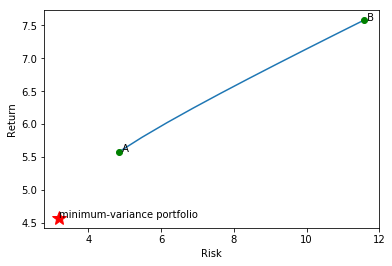

In [20]:
# The combination of this two portfolio
w1 = weights[:,0]
w2 = weights[:,1]
c = np.linspace(0,1,10)
wts = [(1-w)*w1 + w*w2 for w in c]
ret_port = [y_ret.T.dot(wt) for wt in wts]
risk_port = [np.sqrt(np.dot(np.dot(wt.T,Sigma),wt)) for wt in wts]

plt.plot(risk_port,ret_port)
plt.plot(frontier_sigma_array[0],frontier_returns_array[0],marker="o",c='g')
plt.text(frontier_sigma_array[0],frontier_returns_array[0],' A')
plt.plot(frontier_sigma_array[1],frontier_returns_array[1],marker="o",c='g')
plt.text(frontier_sigma_array[1],frontier_returns_array[1],' B')
plt.plot(min_sigma_restrict,min_sigma_ret_restrict,marker="*",c='r',ms=15)
plt.text(min_sigma_restrict,min_sigma_ret_restrict,'minimum-variance portfolio')
plt.xlabel('Risk')
plt.ylabel('Return')

According to this figure, minimum-variance portfolio cannot be represented as a combination of the two portfolios found on 2A if the short selling is not allowed.

In [21]:
# Calculate the efficient frontier with short selling restriction and without restriction
y_ret_cov=Sigma
r_f=0
min_variance_ret = min_sigma_ret_restrict
frontier_ret_rest,frontier_sigma_rest = get_all_frontier(y_ret,y_ret_cov,r_f,short_selling=False)
ret_ideal_rest,risk_ideal_rest = get_efficient_frontier(y_ret,y_ret_cov,r_f,min_variance_ret,short_selling=False)
min_risk_ideal = np.amin(risk_ideal)
min_risk_ret_ideal = ret_ideal[np.where(risk_ideal == np.amin(risk_ideal))[0]]

(0, 15)

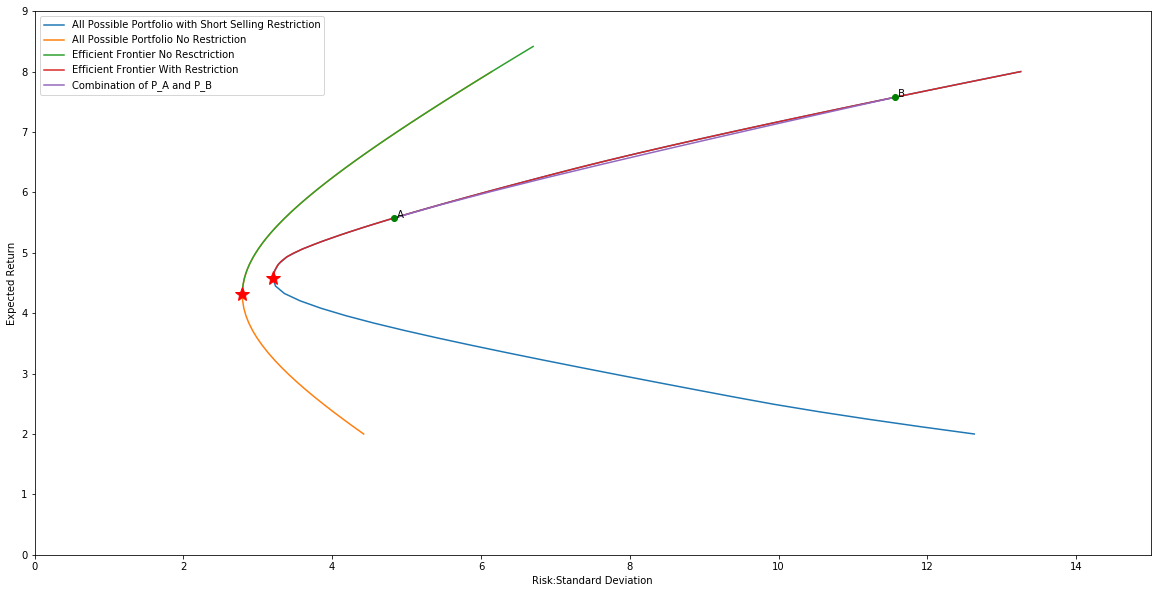

In [22]:
# Plot them together
fig = plt.figure(figsize=(20,10))
plt.plot(frontier_sigma_rest,frontier_ret_rest,label='All Possible Portfolio with Short Selling Restriction')
plt.plot(frontier_sigma,frontier_ret,label='All Possible Portfolio No Restriction')
plt.plot(risk_ideal,ret_ideal,label='Efficient Frontier No Resctriction')
plt.plot(risk_ideal_rest,ret_ideal_rest,label='Efficient Frontier With Restriction')
plt.plot(risk_port,ret_port,label='Combination of P_A and P_B')
plt.plot(frontier_sigma_array[0],frontier_returns_array[0],marker="o",c='g')
plt.text(frontier_sigma_array[0],frontier_returns_array[0],' A')
plt.plot(frontier_sigma_array[1],frontier_returns_array[1],marker="o",c='g')
plt.text(frontier_sigma_array[1],frontier_returns_array[1],' B')
plt.plot(min_sigma_restrict,min_sigma_ret_restrict,marker="*",c='r',ms=15)
plt.plot(min_risk_ideal,min_risk_ret_ideal,marker="*",c='r',ms=15)
plt.legend()
plt.xlabel('Risk:Standard Deviation')
plt.ylabel('Expected Return')
plt.ylim(0,9)
plt.xlim(0,15)